In [2]:
import pandas as pd
import csv
import numpy as np
from scipy.stats import linregress
from matplotlib import pyplot as plt
import hvplot.pandas



wildfires_df = pd.read_csv("../Downloads/US_Lightning_Forest_Fires.csv")
wildfires_df.head()

,Unnamed: 0,index,FIRE_YEAR,Fire_Date,DISCOVERY_TIME,STAT_CAUSE_DESCR,Days_to_extinguish_fire,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIPS_CODE,FIPS_NAME
0,0,1,2004,05-12-2004,845.0,Lightning,0.0,1530.0,0.25,A,38.933056,-120.404444,CA,61.0,Placer
1,1,3,2004,06-28-2004,1600.0,Lightning,5.0,1400.0,0.10,A,38.559167,-119.913333,CA,3.0,Alpine
2,2,4,2004,06-28-2004,1600.0,Lightning,5.0,1200.0,0.10,A,38.559167,-119.933056,CA,3.0,Alpine
3,3,5,2004,06-30-2004,1800.0,Lightning,1.0,1600.0,0.10,A,38.635278,-120.103611,CA,5.0,Amador
4,4,6,2004,07-01-2004,1800.0,Lightning,1.0,1400.0,0.10,A,38.688333,-120.153333,CA,17.0,El Dorado


In [3]:
del wildfires_df["STAT_CAUSE_DESCR"]
del wildfires_df["Unnamed: 0"]


wildfires_df.head()

,index,FIRE_YEAR,Fire_Date,DISCOVERY_TIME,Days_to_extinguish_fire,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIPS_CODE,FIPS_NAME
0,1,2004,05-12-2004,845.0,0.0,1530.0,0.25,A,38.933056,-120.404444,CA,61.0,Placer
1,3,2004,06-28-2004,1600.0,5.0,1400.0,0.10,A,38.559167,-119.913333,CA,3.0,Alpine
2,4,2004,06-28-2004,1600.0,5.0,1200.0,0.10,A,38.559167,-119.933056,CA,3.0,Alpine
3,5,2004,06-30-2004,1800.0,1.0,1600.0,0.10,A,38.635278,-120.103611,CA,5.0,Amador
4,6,2004,07-01-2004,1800.0,1.0,1400.0,0.10,A,38.688333,-120.153333,CA,17.0,El Dorado


In [4]:
louisiana_df = wildfires_df.loc[(wildfires_df["STATE"] == "LA"), :]
louisiana_df.head()

,index,FIRE_YEAR,Fire_Date,DISCOVERY_TIME,Days_to_extinguish_fire,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIPS_CODE,FIPS_NAME
497,1006,2005,07-28-2005,1630.0,0.0,1730.0,1.0,B,31.258889,-92.764444,LA,NaN,NaN
525,1066,2005,08-23-2005,845.0,0.0,1200.0,270.0,D,31.808611,-92.831944,LA,NaN,NaN
3078,5983,2005,08-15-2005,930.0,0.0,1030.0,1.0,B,30.977778,-93.136111,LA,NaN,NaN
3093,6051,2005,10-02-2005,1600.0,0.0,2000.0,2.0,B,30.971111,-93.132500,LA,NaN,NaN
12718,23217,2007,09-10-2007,1500.0,0.0,1715.0,4.0,B,31.249444,-92.673056,LA,79.0,Rapides


In [5]:
louisiana_df['FIPS_NAME'] = louisiana_df['FIPS_NAME'].fillna("No Name Given")

C:\Users\HannahTheWhat\AppData\Local\Temp\ipykernel_18580\1607563458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  louisiana_df['FIPS_NAME'] = louisiana_df['FIPS_NAME'].fillna("No Name Given")


In [6]:
county_count = louisiana_df["FIPS_NAME"].value_counts()
county_name = county_count.index
county_occurences = county_count.values
x_axis = np.arange(len(county_name.unique()))
tick_locations = [value for value in x_axis]

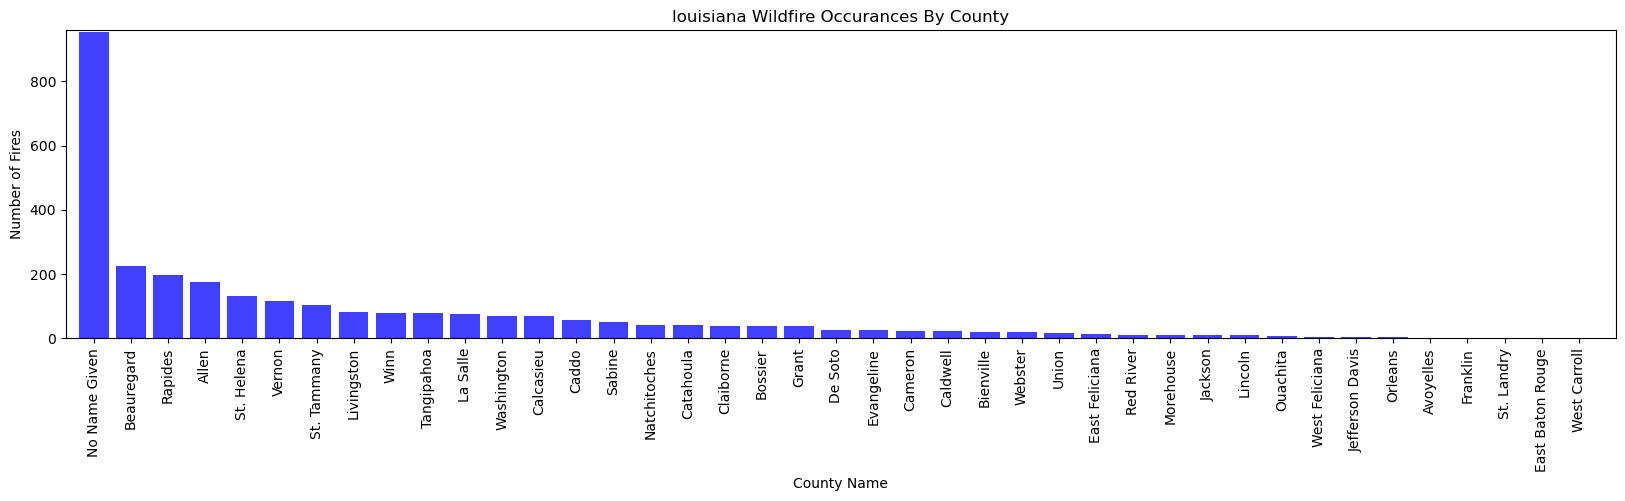

In [7]:
plt.figure(figsize=(20,4))
plt.bar(x_axis, county_occurences, color='b', alpha=0.75, align='center')
plt.xticks(tick_locations, county_name, rotation="vertical")
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(county_occurences)+5)
plt.title("louisiana Wildfire Occurances By County")
plt.xlabel("County Name")
plt.ylabel("Number of Fires")

plt.show()

In [8]:
louisiana_df['FIPS_NAME'] = louisiana_df['FIPS_NAME'].fillna("No Name Given")
fire_count_year = louisiana_df["FIRE_YEAR"].value_counts().sort_index()
year = fire_count_year.index.sort_values()
x_axis = np.arange(len(year.unique()))
tick_locations = [value for value in x_axis]

C:\Users\HannahTheWhat\AppData\Local\Temp\ipykernel_18580\1714794631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  louisiana_df['FIPS_NAME'] = louisiana_df['FIPS_NAME'].fillna("No Name Given")


C:\Users\HannahTheWhat\AppData\Local\Temp\ipykernel_18580\2996907825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  louisiana_df["Fire_Date"] = pd.to_datetime(louisiana_df["Fire_Date"], format="%m-%d-%Y")
C:\Users\HannahTheWhat\AppData\Local\Temp\ipykernel_18580\2996907825.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  louisiana_df["Year"] = louisiana_df["Fire_Date"].dt.year


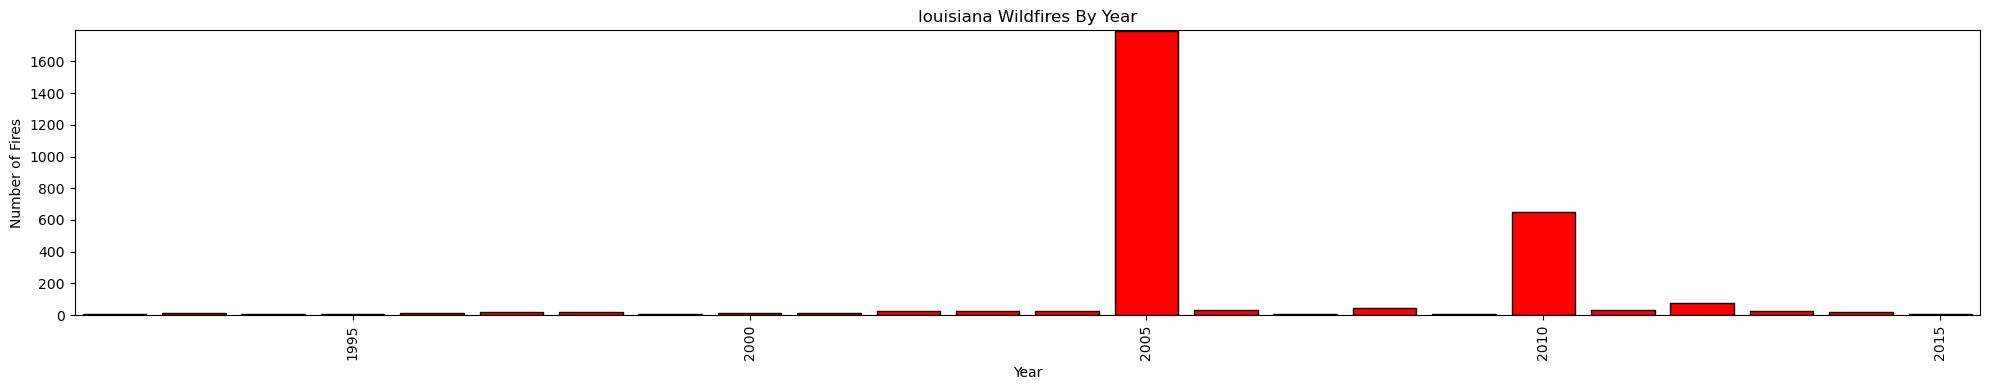

In [9]:
louisiana_df["Fire_Date"] = pd.to_datetime(louisiana_df["Fire_Date"], format="%m-%d-%Y")


louisiana_df["Year"] = louisiana_df["Fire_Date"].dt.year


fires_by_year = louisiana_df["Year"].value_counts().sort_index()


plt.figure(figsize=(20, 4))
plt.bar(fires_by_year.index, fires_by_year, color='r', edgecolor='black')

plt.xticks(rotation=90)
plt.xlim(min(fires_by_year.index) - 0.5, max(fires_by_year.index) + 0.5)
plt.ylim(0, max(fires_by_year) + 5)

plt.title("louisiana Wildfires By Year")
plt.xlabel("Year")
plt.ylabel("Number of Fires")

plt.tight_layout()
plt.show()

C:\Users\HannahTheWhat\AppData\Local\Temp\ipykernel_18580\4114771561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  louisiana_df["Fire_Date"] = pd.to_datetime(louisiana_df["Fire_Date"], format="%m-%d-%Y")
C:\Users\HannahTheWhat\AppData\Local\Temp\ipykernel_18580\4114771561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  louisiana_df["Month"] = louisiana_df["Fire_Date"].dt.month


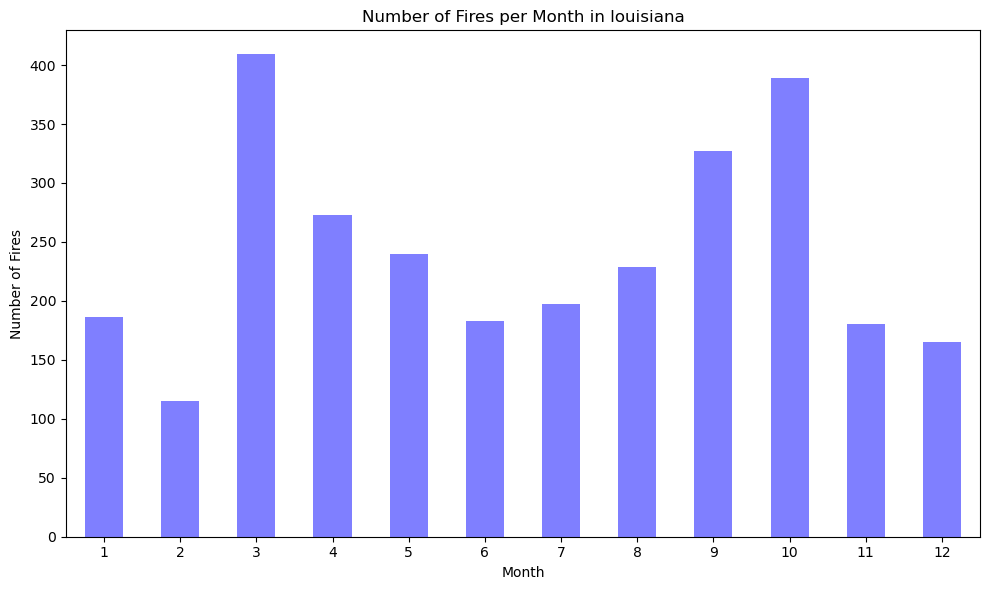

In [10]:
louisiana_df["Fire_Date"] = pd.to_datetime(louisiana_df["Fire_Date"], format="%m-%d-%Y")
louisiana_df["Month"] = louisiana_df["Fire_Date"].dt.month
fires_by_month = louisiana_df.groupby("Month").size()
plt.figure(figsize=(10, 6))
fires_by_month.plot(kind="bar", color='b', alpha=0.5)
plt.title("Number of Fires per Month in louisiana")
plt.xlabel("Month")
plt.ylabel("Number of Fires")

plt.xticks(rotation=0)  
plt.tight_layout()
plt.show()

In [11]:
louisiana_fire_size = louisiana_df[["FIRE_SIZE","FIRE_YEAR"]]

bins = [0,1,100,1000,10000,50000,65000]
group_names = ["<1 Acre","<100 Acres","<1000 Acres","<10000 Acres","<50000 Acres",">50000 Acres"]

louisiana_fire_size["Fire Size Summary"] = pd.cut(louisiana_fire_size["FIRE_SIZE"], bins, labels=group_names,include_lowest=True)
louisiana_fire_size.head()

C:\Users\HannahTheWhat\AppData\Local\Temp\ipykernel_18580\1545530205.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  louisiana_fire_size["Fire Size Summary"] = pd.cut(louisiana_fire_size["FIRE_SIZE"], bins, labels=group_names,include_lowest=True)


,FIRE_SIZE,FIRE_YEAR,Fire Size Summary
497,1.0,2005,<1 Acre
525,270.0,2005,<1000 Acres
3078,1.0,2005,<1 Acre
3093,2.0,2005,<100 Acres
12718,4.0,2007,<100 Acres


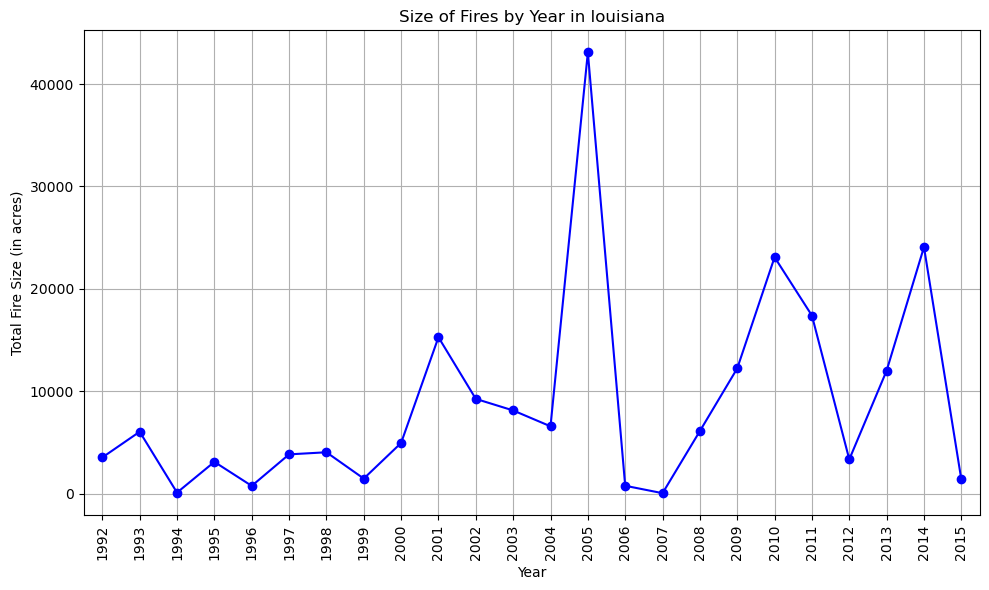

In [12]:
louisiana_df = louisiana_df.sort_values(by="FIRE_SIZE")

fires_by_year = louisiana_df.groupby("FIRE_YEAR")["FIRE_SIZE"].sum()
plt.figure(figsize=(10, 6))
plt.plot(fires_by_year.index, fires_by_year, marker='o', color='b')
plt.title("Size of Fires by Year in louisiana")
plt.xlabel("Year")
plt.ylabel("Total Fire Size (in acres)")
plt.xticks(fires_by_year.index, rotation=90)
plt.xlim(min(fires_by_year.index) - 0.5, max(fires_by_year.index) + 0.5)
plt.tight_layout()
plt.grid(True) 

plt.show()

In [13]:

size_vs_days_ext = louisiana_df[["FIRE_SIZE", "Days_to_extinguish_fire"]]



size_vs_days_ext = size_vs_days_ext.set_index("FIRE_SIZE")

size_vs_days_ext.head()

,Days_to_extinguish_fire
FIRE_SIZE,
0.01,0.0
0.01,0.0
0.01,NaN
0.01,NaN
0.05,NaN


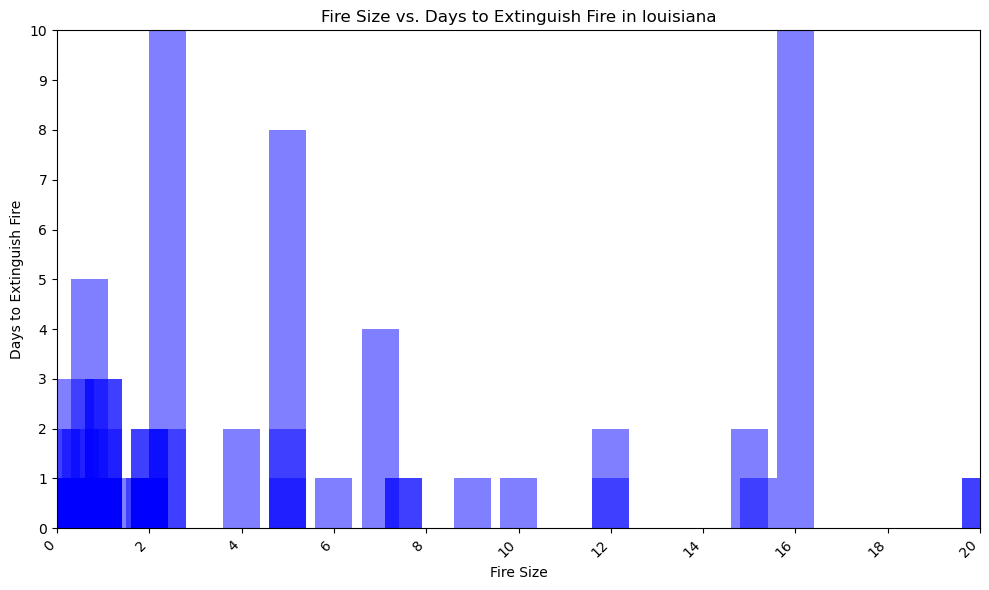

In [14]:
size_vs_days_ext = size_vs_days_ext.sort_index()


x_values = size_vs_days_ext.index
y_values = size_vs_days_ext["Days_to_extinguish_fire"]


plt.figure(figsize=(10, 6))
plt.bar(x_values, y_values, color='b', alpha=0.5, align='center')

plt.title("Fire Size vs. Days to Extinguish Fire in louisiana")
plt.xlabel("Fire Size")
plt.ylabel("Days to Extinguish Fire")

plt.xticks(rotation=45, ha='right') 


plt.xlim(0, 20)
plt.xticks(range(0, 21, 2))  

plt.ylim(0, 10)
plt.yticks(range(0, 11, 1))  

plt.tight_layout()  

plt.show()